In [1]:
%%javascript
require.config({ 
    paths: { 
    d3: 'https://d3js.org/d3.v7.min'
}});

require(["d3"], function(d3) {
    window.d3 = d3;
});

<IPython.core.display.Javascript object>

In [2]:
import sys
sys.path.append("/Users/jameskitchens/Documents/GitHub/sparg2.0")

import sparg
import tskit
import msprime
import numpy as np
import tskit_arg_visualizer as viz
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("always")

In [3]:
ts = tskit.load("simple_space_uniform_start_rep1.trees")

np.random.seed(1)
keep_nodes = list(np.random.choice(ts.samples(), 50, replace=False))
ts_sim, maps_sim = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_flagged = sparg.add_recomb_node_flags_to_ts(ts=ts_sim)
ts_filtered, maps_filtered = sparg.remove_uninformative_nodes(ts=ts_flagged)

In [4]:
ts_chopped_20000 = ts_filtered.decapitate(20000)
ts_attached_20000, maps_attached_20000 = sparg.remove_unattached_nodes(ts=ts_chopped_20000)
ts_chopped_40000 = ts_filtered.decapitate(40000)
ts_attached_40000, maps_attached_40000 = sparg.remove_unattached_nodes(ts=ts_chopped_40000)

In [5]:
def reduce_ts_and_calc(ts, bp):
    ts_short = ts.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
    ts_sim, maps_sim = sparg.remove_uninformative_nodes(ts=ts_short)
    ts_merged = sparg.merge_unnecessary_roots(ts=ts_sim)
    ts_attached, maps_attached = sparg.remove_unattached_nodes(ts=ts_merged)
    dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_attached)
    return dispersal_rate, cov_mat, paths

In [6]:
#outfile = open("simple_space_uniform_start_50_seqlen_1_chopped_20000_40000.txt", "w")
i = 0
for bp in ts_filtered.breakpoints():
    if i < 2:
        if i > 0:
            dispersal_rate, cov_mat, paths = reduce_ts_and_calc(ts=ts_filtered, bp=bp)
            dispersal_rate_chopped_20000, cov_mat_chopped_20000, paths_chopped_20000 = reduce_ts_and_calc(ts=ts_attached_20000, bp=bp)
            dispersal_rate_chopped_40000, cov_mat_chopped_40000, paths_chopped_40000 = reduce_ts_and_calc(ts=ts_attached_40000, bp=bp)
            #outfile.write(str(i) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(dispersal_rate_chopped_20000[0][0]) + " " + str(dispersal_rate_chopped_20000[1][1]) + " " + str(dispersal_rate_chopped_40000[0][0]) + " " + str(dispersal_rate_chopped_40000[1][1]) + " " + str(len(paths)) + " " + str(len(paths_chopped_20000)) + " " + str(len(paths_chopped_40000)) + "\n")
            print(i, bp, dispersal_rate[0][0], dispersal_rate[1][1], dispersal_rate_chopped_20000[0][0], dispersal_rate_chopped_20000[1][1], dispersal_rate_chopped_40000[0][0], dispersal_rate_chopped_40000[1][1], len(paths), len(paths_chopped_20000), len(paths_chopped_40000))
            #print("i:", i)
            #print("Sequence length:", int(bp))
            #print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            #print("Dispersal Rates:", dispersal_rate_chopped_20000[0][0], dispersal_rate_chopped_20000[1][1])
            #print("Dispersal Rates:", dispersal_rate_chopped_40000[0][0], dispersal_rate_chopped_40000[1][1])
    else:
        break
    i += 1
#outfile.close()

100%|███████████████████████████████████████| 102/102 [00:00<00:00, 1744.73it/s]


1 104.0 0.295269538690288 0.169918782311152 0.293820382485677 0.167336714768494 0.294863387417949 0.169854229182144 50 50 50


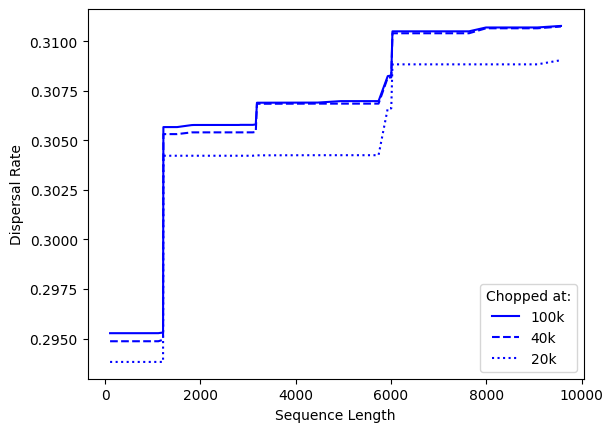

In [20]:
dispersal = np.loadtxt("simple_space_uniform_start_50_seqlen_1_chopped_20000_40000_test.txt")
plt.plot(dispersal[:,1], dispersal[:,2], color="blue", label="100k")
#plt.plot(dispersal[:,1], dispersal[:,3], color="red", label="y-axis (100k)")
plt.plot(dispersal[:,1], dispersal[:,6], color="blue", linestyle="dashed", label="40k")
#plt.plot(dispersal[:,1], dispersal[:,7], color="red", linestyle="dashed", label="y-axis (40k)")
plt.plot(dispersal[:,1], dispersal[:,4], color="blue", linestyle="dotted", label="20k")
#plt.plot(dispersal[:,1], dispersal[:,5], color="red", linestyle="dotted", label="y-axis (20k)")
plt.xlabel("Sequence Length")
plt.ylabel("Dispersal Rate")
plt.legend(loc="lower right", title="Chopped at:")
plt.show()